In [62]:
import os
import sys
import csv
import numpy

import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
table_s2_url = 'https://www.cell.com/cms/attachment/2119272813/2091487649/mmc2.xlsx'

In [7]:
table_s2 = pd.read_excel(table_s2_url)

In [8]:
table_s2

,Name,Site,ho2 (95% CI),h2 (95% CI)
0,Acne,Columbia,0.35 (0.22-0.55),0.81 (0.73-0.89)
1,"Allergy, Unspecified",Columbia,0.30 (0.18-0.42),0.67 (0.61-0.72)
2,Asthma*,Weill Cornell,0.37 (0.21-0.58),0.30 (0.22-0.37)
3,Asthma*,Columbia,0.51 (0.30-0.63),0.30 (0.22-0.37)
4,Asthma with status asthmaticus,Columbia,0.45 (0.27-0.56),0.67 (0.61-0.72)
5,Atopic dermatitis,Columbia,0.42 (0.25-0.62),0.78 (0.73-0.83)
6,Atopic dermatitis and related conditions*,Columbia,0.50 (0.34-0.78),0.78 (0.73-0.83)
7,Attention deficit hyperactivity disorder,Columbia,0.36 (0.22-0.50),0.72 (0.56-0.85)
8,Celiac disease*,Columbia,0.77 (0.41-0.98),0.75 (0.55-0.96)
9,Depression,Columbia,0.25 (0.17-0.30),0.37 (0.31-0.42)


In [14]:
h2o_title = table_s2.columns[2]
lit_title = table_s2.columns[3]

In [20]:
h2o = [float(x.split(' ')[0]) for x in table_s2[h2o_title]]
lit = [float(x.split(' ')[0]) for x in table_s2[lit_title]]

In [21]:
stats.pearsonr(h2o, lit)

(0.45083991595725004, 0.008460213821176142)

In [33]:
linreg = stats.linregress(h2o, lit)
linreg.slope, linreg.intercept, linreg.pvalue

(0.5938199766002122, 0.37135556054888774, 0.008460213821176139)

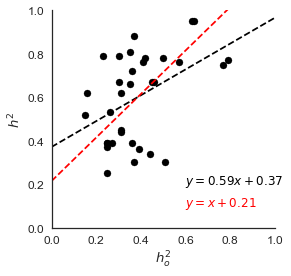

In [99]:
mu_diff = numpy.mean([y-x for x,y in zip(h2o, lit)])

sns.set(style='white', font_scale=1.2)

plt.figure(figsize=(4,4))
plt.scatter(h2o, lit, color='k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('$h^2_o$')
plt.ylabel('$h^2$')

plt.plot([0,1], [linreg.intercept, linreg.slope+linreg.intercept], 'k--')
plt.plot([0,1], [mu_diff, 1+mu_diff], 'r--')

plt.text(0.6, 0.1, '$y=x+%.2f$' % mu_diff, color='red', fontsize=12)
plt.text(0.6, 0.2, '$y=%.2fx+%.2f$' % (linreg.slope, linreg.intercept), color='black', fontsize=12)

sns.despine()

plt.savefig('../results/scatter_withlines.pdf', bbox_inches='tight')

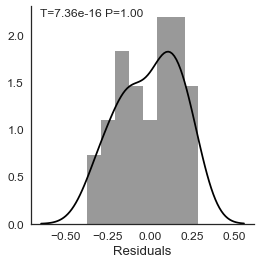

In [97]:
yhats = [linreg.slope*x+linreg.intercept for x in h2o]
resid = [y-yhat for y,yhat in zip(lit, yhats)]

sns.set(style='white', font_scale=1.2)
plt.figure(figsize=(4,4))
sns.distplot(resid, bins=8, color='k')
plt.xlabel('Residuals')
t, p = stats.ttest_1samp(resid, 0)
plt.text(-0.65,2.2, "T=%.2e P=%.2f" % (t,p), fontsize=12)
sns.despine()

plt.savefig('../results/fitslope_residuals.pdf')

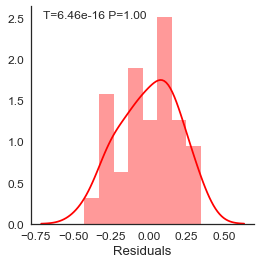

In [98]:
yhats = [1.0*x+mu_diff for x in h2o]
resid = [y-yhat for y,yhat in zip(lit, yhats)]

sns.set(style='white', font_scale=1.2)
plt.figure(figsize=(4,4))
sns.distplot(resid, bins=8, color='r')
plt.xlabel('Residuals')
t, p = stats.ttest_1samp(resid, 0)
plt.text(-0.7,2.5, "T=%.2e P=%.2f" % (t,p), fontsize=12);

sns.despine()

plt.savefig('../results/slope1_residuals.pdf')